# Imports

In [1]:
%reset -f

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score

import visualkeras
from PIL import ImageFont

import warnings 
warnings.filterwarnings('ignore')

print("Tensorflow version:",tf.__version__)
print("Keras version:",keras.__version__)

Tensorflow version: 2.16.1
Keras version: 3.3.3


# Load data

In [3]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# Exploratory Data Analysis

In [4]:
print('X_train Shape: {}'.format(X_train.shape))
print('X_test Shape: {}'.format(X_test.shape))
print('Y_train Shape: {}'.format(Y_train.shape))
print('Y_test Shape: {}'.format(Y_test.shape))

X_train Shape: (50000, 32, 32, 3)
X_test Shape: (10000, 32, 32, 3)
Y_train Shape: (50000, 1)
Y_test Shape: (10000, 1)


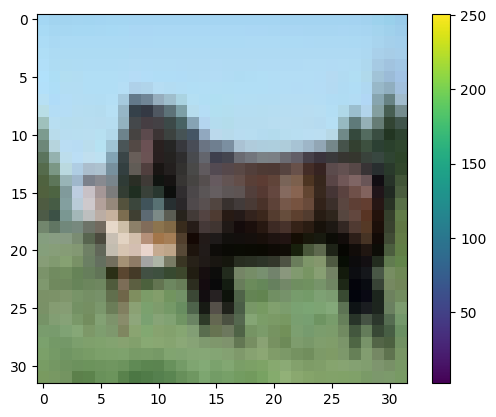

In [5]:
plt.figure()
plt.imshow(X_train[12])
plt.colorbar()

# Preprocessing

In [6]:
# Normalizing
X_train = X_train/255
X_test = X_test/255

# One-Hot-Encoding
Y_train_en = to_categorical(Y_train,10)
Y_test_en = to_categorical(Y_test,10)

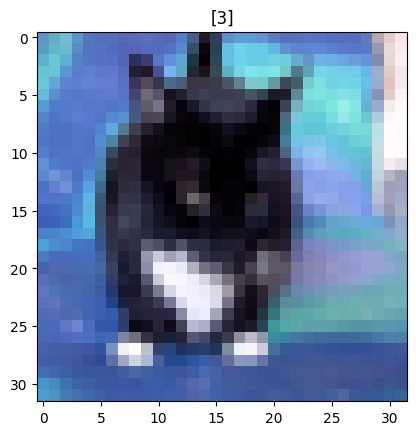

In [26]:
# Visualizing the data
i = np.random.randint(X_train.shape[0])
plt.title(Y_train[i])
plt.imshow(X_train[i])

# Model building

## Base model

<img src="assets/model_base.png">

In [8]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dense(10, activation ='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,802 (475.79 KB)

 Trainable params: 121,802 (475.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(X_train, Y_train_en, epochs=5, verbose=1,validation_data=(X_test,Y_test_en))
# history = model.fit(X_train, Y_train_en, epochs = 30, verbose=1,validation_data=(X_test,Y_test_en))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3578 - loss: 1.7528 - val_accuracy: 0.4907 - val_loss: 1.4208
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5497 - loss: 1.2706 - val_accuracy: 0.5671 - val_loss: 1.2031
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6035 - loss: 1.1228 - val_accuracy: 0.6258 - val_loss: 1.0691
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6439 - loss: 1.0206 - val_accuracy: 0.6404 - val_loss: 1.0188
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6709 - loss: 0.9416 - val_accuracy: 0.6450 - val_loss: 1.0161


In [10]:
# if you have graphfiz
# plot_model(model, to_file='architecture_model_base.png', show_shapes=True, show_layer_names=True)

In [11]:
# visualkeras.layered_view(model, legend=True)

In [12]:
evaluation = model.evaluate(X_test, Y_test_en)
print('Test Accuracy of Base Model: {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6383 - loss: 1.0201
Test Accuracy of Base Model: 0.6449999809265137


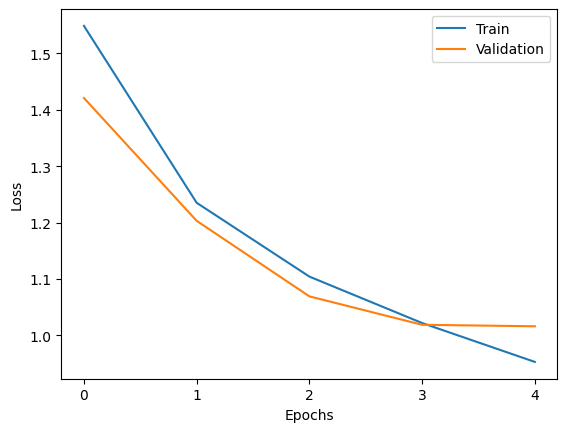

In [13]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xticks(range(5))
    plt.legend(['Train', 'Validation'])
    plt.show()

plot_loss(history)

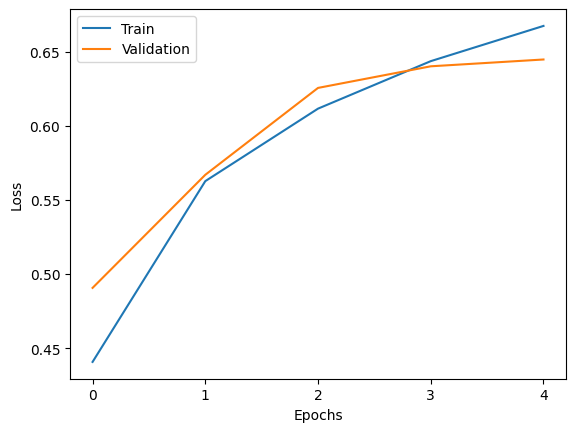

In [14]:
def plot_metrics(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xticks(range(5))
    plt.legend(['Train', 'Validation'])
    plt.show()

plot_metrics(history)

After running our base model with 30 Epochs, we are getting 95.92% training accuracy and 65.66% test accuracy which is good but as we can see the validation loss is continuously increasing from the first epoch till the last epoch i.e our base model is overfitting. 

We can achieve this by adding a few dropout layers in our model. Now we are building our model by dropping 25% of units.</blockquote>

## Model with Dropout

<img src="assets/model_dropout.png">

In [15]:
# Model_1 with Dropouts
model_1 = Sequential()
model_1.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.5)) 
model_1.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))
model_1.add(Flatten())
model_1.add(Dense(256,activation='relu'))
model_1.add(Dense(10,activation='softmax'))
model_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 481,162 (1.84 MB)

 Trainable params: 481,162 (1.84 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Ideal case: epochs=50
history_1 = model_1.fit(X_train, Y_train_en, epochs=5, verbose=1, validation_data=(X_test,Y_test_en))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.3535 - loss: 1.7697 - val_accuracy: 0.5318 - val_loss: 1.3484
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5481 - loss: 1.2729 - val_accuracy: 0.6052 - val_loss: 1.1291
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6027 - loss: 1.1333 - val_accuracy: 0.6339 - val_loss: 1.0365
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6414 - loss: 1.0186 - val_accuracy: 0.6521 - val_loss: 0.9909
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6633 - loss: 0.9524 - val_accuracy: 0.6646 - val_loss: 0.9434


In [17]:
evaluation = model_1.evaluate(X_test, Y_test_en)
print('Test Accuracy of Model with Dropouts: {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6614 - loss: 0.9450
Test Accuracy of Model with Dropouts: 0.6646000146865845


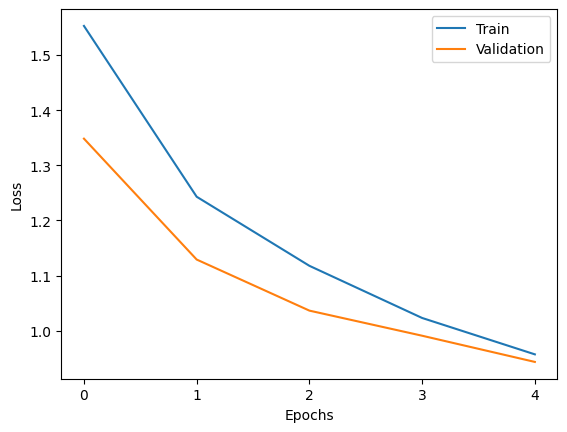

In [18]:
plot_loss(history_1)

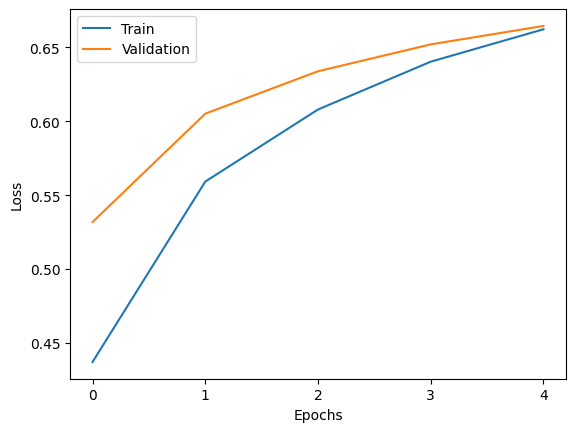

In [19]:
plot_metrics(history_1)

After running our model_1 with 50 Epochs, we can see that the validation accuracy has improved from 65.66% to 71.27% due to reduction in our model’s validation loss from 2.5051 to 1.0879. 

We will continue to train our model by increasing the number of epochs and by adding more filters.</blockquote>

## Model with more filters

<img src="assets/model_more_filters.png">

In [20]:
model_2 = Sequential()
model_2.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.4)) 
model_2.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.4))
model_2.add(Flatten())
model_2.add(Dense(1024,activation='relu'))
model_2.add(Dense(1024,activation='relu'))
model_2.add(Dense(units =10  , activation = 'softmax'))
model_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 10, 10, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │     1,180,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,702,730 (10.31 MB)

 Trainable params: 2,702,730 (10.31 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Ideal case: epochs=100
history_2 = model_2.fit(X_train, Y_train_en, epochs=5, verbose=1, validation_data=(X_test,Y_test_en))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 188s 119ms/step - accuracy: 0.2498 - loss: 1.9558 - val_accuracy: 0.4672 - val_loss: 1.4329
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 190s 122ms/step - accuracy: 0.4581 - loss: 1.4693 - val_accuracy: 0.5433 - val_loss: 1.2523
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 193s 123ms/step - accuracy: 0.5206 - loss: 1.3157 - val_accuracy: 0.5779 - val_loss: 1.1956
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 187s 120ms/step - accuracy: 0.5655 - loss: 1.2209 - val_accuracy: 0.6220 - val_loss: 1.0752
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 179s 114ms/step - accuracy: 0.5916 - loss: 1.1441 - val_accuracy: 0.6174 - val_loss: 1.0815


In [22]:
evaluation = model_2.evaluate(X_test, Y_test_en)
print('Test Accuracy of Model_2(with more  filters): {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.6251 - loss: 1.0735
Test Accuracy of Model_2(with more  filters): 0.6173999905586243


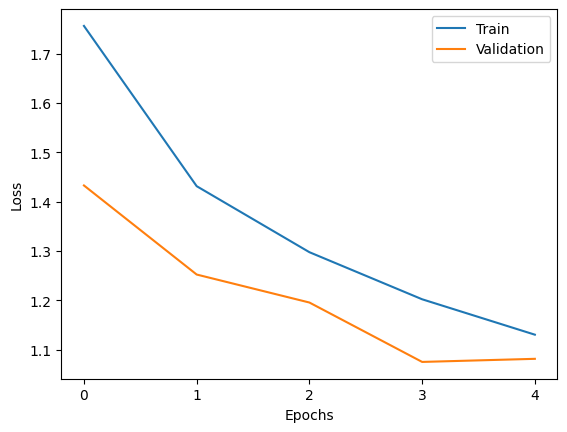

In [23]:
plot_loss(history_2)

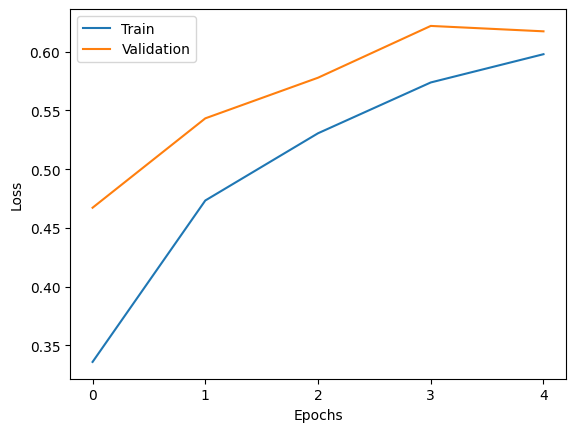

In [24]:
plot_metrics(history_2)

After running our model_2 with 100 Epochs, we can see that the validation accuracy has further improved from 71.27% to 74.76%

We will continue to train our model by adding Batch Normalization.

## Model with Batch Normalization

<img src="assets/model_batch_norm.png">

In [25]:
model_3 = Sequential()
model_3.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.2))
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.35))
model_3.add(Flatten())
model_3.add(Dense(256, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))
model_3.add(Dense(10, activation='softmax'))
model_3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,517,450 (5.79 MB)

 Trainable params: 1,515,658 (5.78 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [26]:
# Ideal case: epochs=100
history_3 = model_3.fit(X_train, Y_train_en, epochs=5, verbose = 1, validation_data = (X_test, Y_test_en))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 501s 314ms/step - accuracy: 0.3501 - loss: 2.0020 - val_accuracy: 0.5576 - val_loss: 1.2703
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 507s 324ms/step - accuracy: 0.6340 - loss: 1.0412 - val_accuracy: 0.5679 - val_loss: 1.3801
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 501s 321ms/step - accuracy: 0.7287 - loss: 0.7852 - val_accuracy: 0.7252 - val_loss: 0.8252
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 472s 302ms/step - accuracy: 0.7735 - loss: 0.6668 - val_accuracy: 0.7617 - val_loss: 0.6976
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 471s 301ms/step - accuracy: 0.8062 - loss: 0.5666 - val_accuracy: 0.7694 - val_loss: 0.6764


In [27]:
evaluation = model_3.evaluate(X_test, Y_test_en)
print('Test Accuracy of Model_3 (with Batch Normalization): {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.7731 - loss: 0.6635
Test Accuracy of Model_3 (with Batch Normalization): 0.7694000005722046


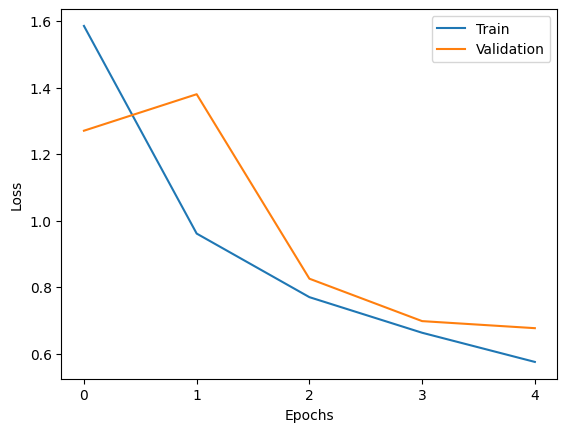

In [28]:
plot_loss(history_3)

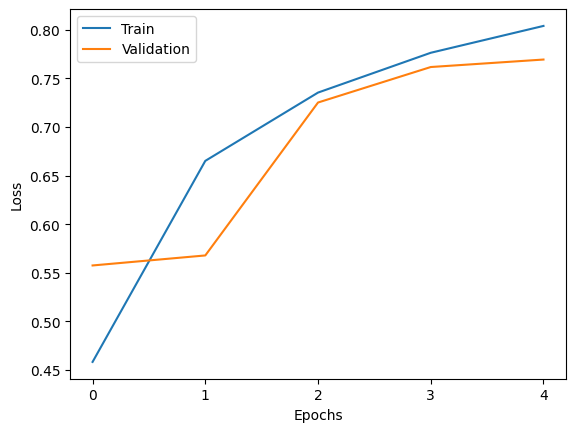

In [29]:
plot_metrics(history_3)

After running our model_3 with Batch Normalization, we can see that the validation accuracy has further improved from 74.76% to 87.90%